### Importing Libraries

In [1]:
#Important Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

#Data Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from scipy.stats import zscore

#Model selection and evalution
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

#Models
from sklearn.ensemble import RandomForestRegressor

# To ignore warnings generated by the current version of seaborn 
import warnings                  
warnings.filterwarnings("ignore")

### Data Extraction and Preprocessing
Pandas provides the function read_csv which can be used to read csv files and import the data from both the local memory and any link to csv over the internet.

In [2]:
data = pd.read_excel('input_data.xlsx')
data.head()

,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,5599.0,15/9-F-12,11.50,308.056,104.418,201.250,18.640,14.48443,106.806,16.295,92.475,285.0,38889.0,385.0
1,5599.0,15/9-F-12,24.00,303.034,105.403,182.145,16.467,22.83299,120.889,53.374,89.620,1870.0,285246.0,7.0
2,5599.0,15/9-F-12,22.50,295.586,105.775,181.868,12.660,31.24997,113.718,72.738,80.120,3124.0,509955.0,1.0
3,5599.0,15/9-F-12,23.15,297.663,105.752,180.832,5.264,28.51893,116.831,69.996,84.251,2608.0,383427.0,1.0
4,5599.0,15/9-F-12,24.00,295.936,105.811,180.501,12.385,30.22790,115.434,71.518,82.359,3052.0,418474.0,5.0


In [3]:
test = pd.read_excel('test_data.xlsx')
test.head()

,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_WAT_VOL
0,5599,15/9-F-12,24.0,0,0,52.147,28.714,35.23351,52.147,72.510,23.500,105134.0,712.0
1,5599,15/9-F-12,24.0,0,0,51.696,28.870,35.46763,51.696,73.466,23.056,105584.0,716.0
2,5599,15/9-F-12,24.0,0,0,51.508,28.703,35.57401,51.508,72.680,22.845,103868.0,720.0
3,5599,15/9-F-12,24.0,0,0,51.184,28.510,35.65656,51.184,71.846,22.524,104654.0,732.0
4,5599,15/9-F-12,24.0,0,0,50.529,28.338,35.71326,50.529,71.837,21.861,105072.0,717.0


In [4]:
# Checking for any null values in input data
data.isnull().sum()

NPD_WELL_BORE_CODE           2
NPD_WELL_BORE_NAME           0
ON_STREAM_HRS                1
AVG_DOWNHOLE_PRESSURE        2
AVG_DOWNHOLE_TEMPERATURE     8
AVG_DP_TUBING                7
AVG_ANNULUS_PRESS            8
AVG_CHOKE_SIZE_P             5
AVG_WHP_P                    5
AVG_WHT_P                    4
DP_CHOKE_SIZE                4
BORE_OIL_VOL                10
BORE_GAS_VOL                 5
BORE_WAT_VOL                 5
dtype: int64

In [5]:
# Checking for any null values in test data
test.isnull().sum()

NPD_WELL_BORE_CODE          0
NPD_WELL_BORE_NAME          0
ON_STREAM_HRS               0
AVG_DOWNHOLE_PRESSURE       0
AVG_DOWNHOLE_TEMPERATURE    0
AVG_DP_TUBING               7
AVG_ANNULUS_PRESS           6
AVG_CHOKE_SIZE_P            5
AVG_WHP_P                   3
AVG_WHT_P                   6
DP_CHOKE_SIZE               5
BORE_GAS_VOL                6
BORE_WAT_VOL                7
dtype: int64

In [6]:
# Generating the descriptive statistics for input data
data.describe()

,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,2498.0,2499.000000,2498.000000,2492.000000,2493.000000,2492.000000,2495.000000,2495.000000,2496.000000,2496.000000,2490.000000,2495.000000,2495.000000
mean,5599.0,21.204106,98.946740,40.659215,97.328776,16.690249,66.177557,52.143907,80.020514,22.623661,1752.616867,255293.340681,2503.943487
std,0.0,6.970983,125.947923,51.722656,74.578452,6.578753,29.862094,24.416289,19.990477,23.531784,1736.284570,245136.405876,2057.812677
min,5599.0,0.000000,0.000000,0.000000,0.058000,0.000000,0.000000,0.000000,0.035000,0.058000,0.000000,0.000000,-458.000000
25%,5599.0,24.000000,0.000000,0.000000,33.614000,13.182000,48.259940,33.560500,79.332250,4.868250,295.500000,46059.000000,54.000000
50%,5599.0,24.000000,0.000000,0.000000,48.992000,16.474500,65.974740,45.963000,88.067500,14.415000,968.500000,149118.000000,3088.000000
75%,5599.0,24.000000,250.771250,106.397250,175.979000,20.661500,99.169365,64.519500,90.552000,32.230250,3056.250000,445882.000000,4554.000000
max,5599.0,25.000000,317.701000,107.508000,314.409000,30.020000,100.000000,137.311000,92.459000,124.123000,5902.000000,851132.000000,8020.000000


In [7]:
# Generating the descriptive statistics for test data
test.describe()

,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_WAT_VOL
count,499.0,499.000000,499.0,499.0,492.000000,493.000000,494.000000,496.000000,493.000000,494.000000,493.000000,492.000000
mean,5599.0,23.425571,0.0,0.0,31.069900,20.000225,85.244240,31.243724,77.607957,4.199789,58162.770791,1105.152439
std,0.0,3.116973,0.0,0.0,8.867971,4.506915,27.554155,9.501805,8.006400,8.367061,25900.758834,243.461442
min,5599.0,0.000000,0.0,0.0,1.265000,0.000000,0.127140,1.265000,9.408000,0.255000,0.000000,0.000000
25%,5599.0,24.000000,0.0,0.0,26.518500,18.852000,97.916670,26.520750,77.533000,0.563000,35248.000000,1115.750000
50%,5599.0,24.000000,0.0,0.0,27.571500,20.234000,100.000000,27.603500,79.580000,0.753000,56169.000000,1182.000000
75%,5599.0,24.000000,0.0,0.0,29.661000,21.225000,100.000000,29.692750,80.533000,1.070750,79515.000000,1239.000000
max,5599.0,24.000000,0.0,0.0,110.390000,28.870000,100.000000,110.390000,82.490000,81.751000,108156.000000,1566.000000


### Data visualisation
Plotting our data points on 2-D graph gives us a basic idea of what trend the data follows. With the help of visualizations we eyeball our dataset and see if we can manually find any relationship between the data.

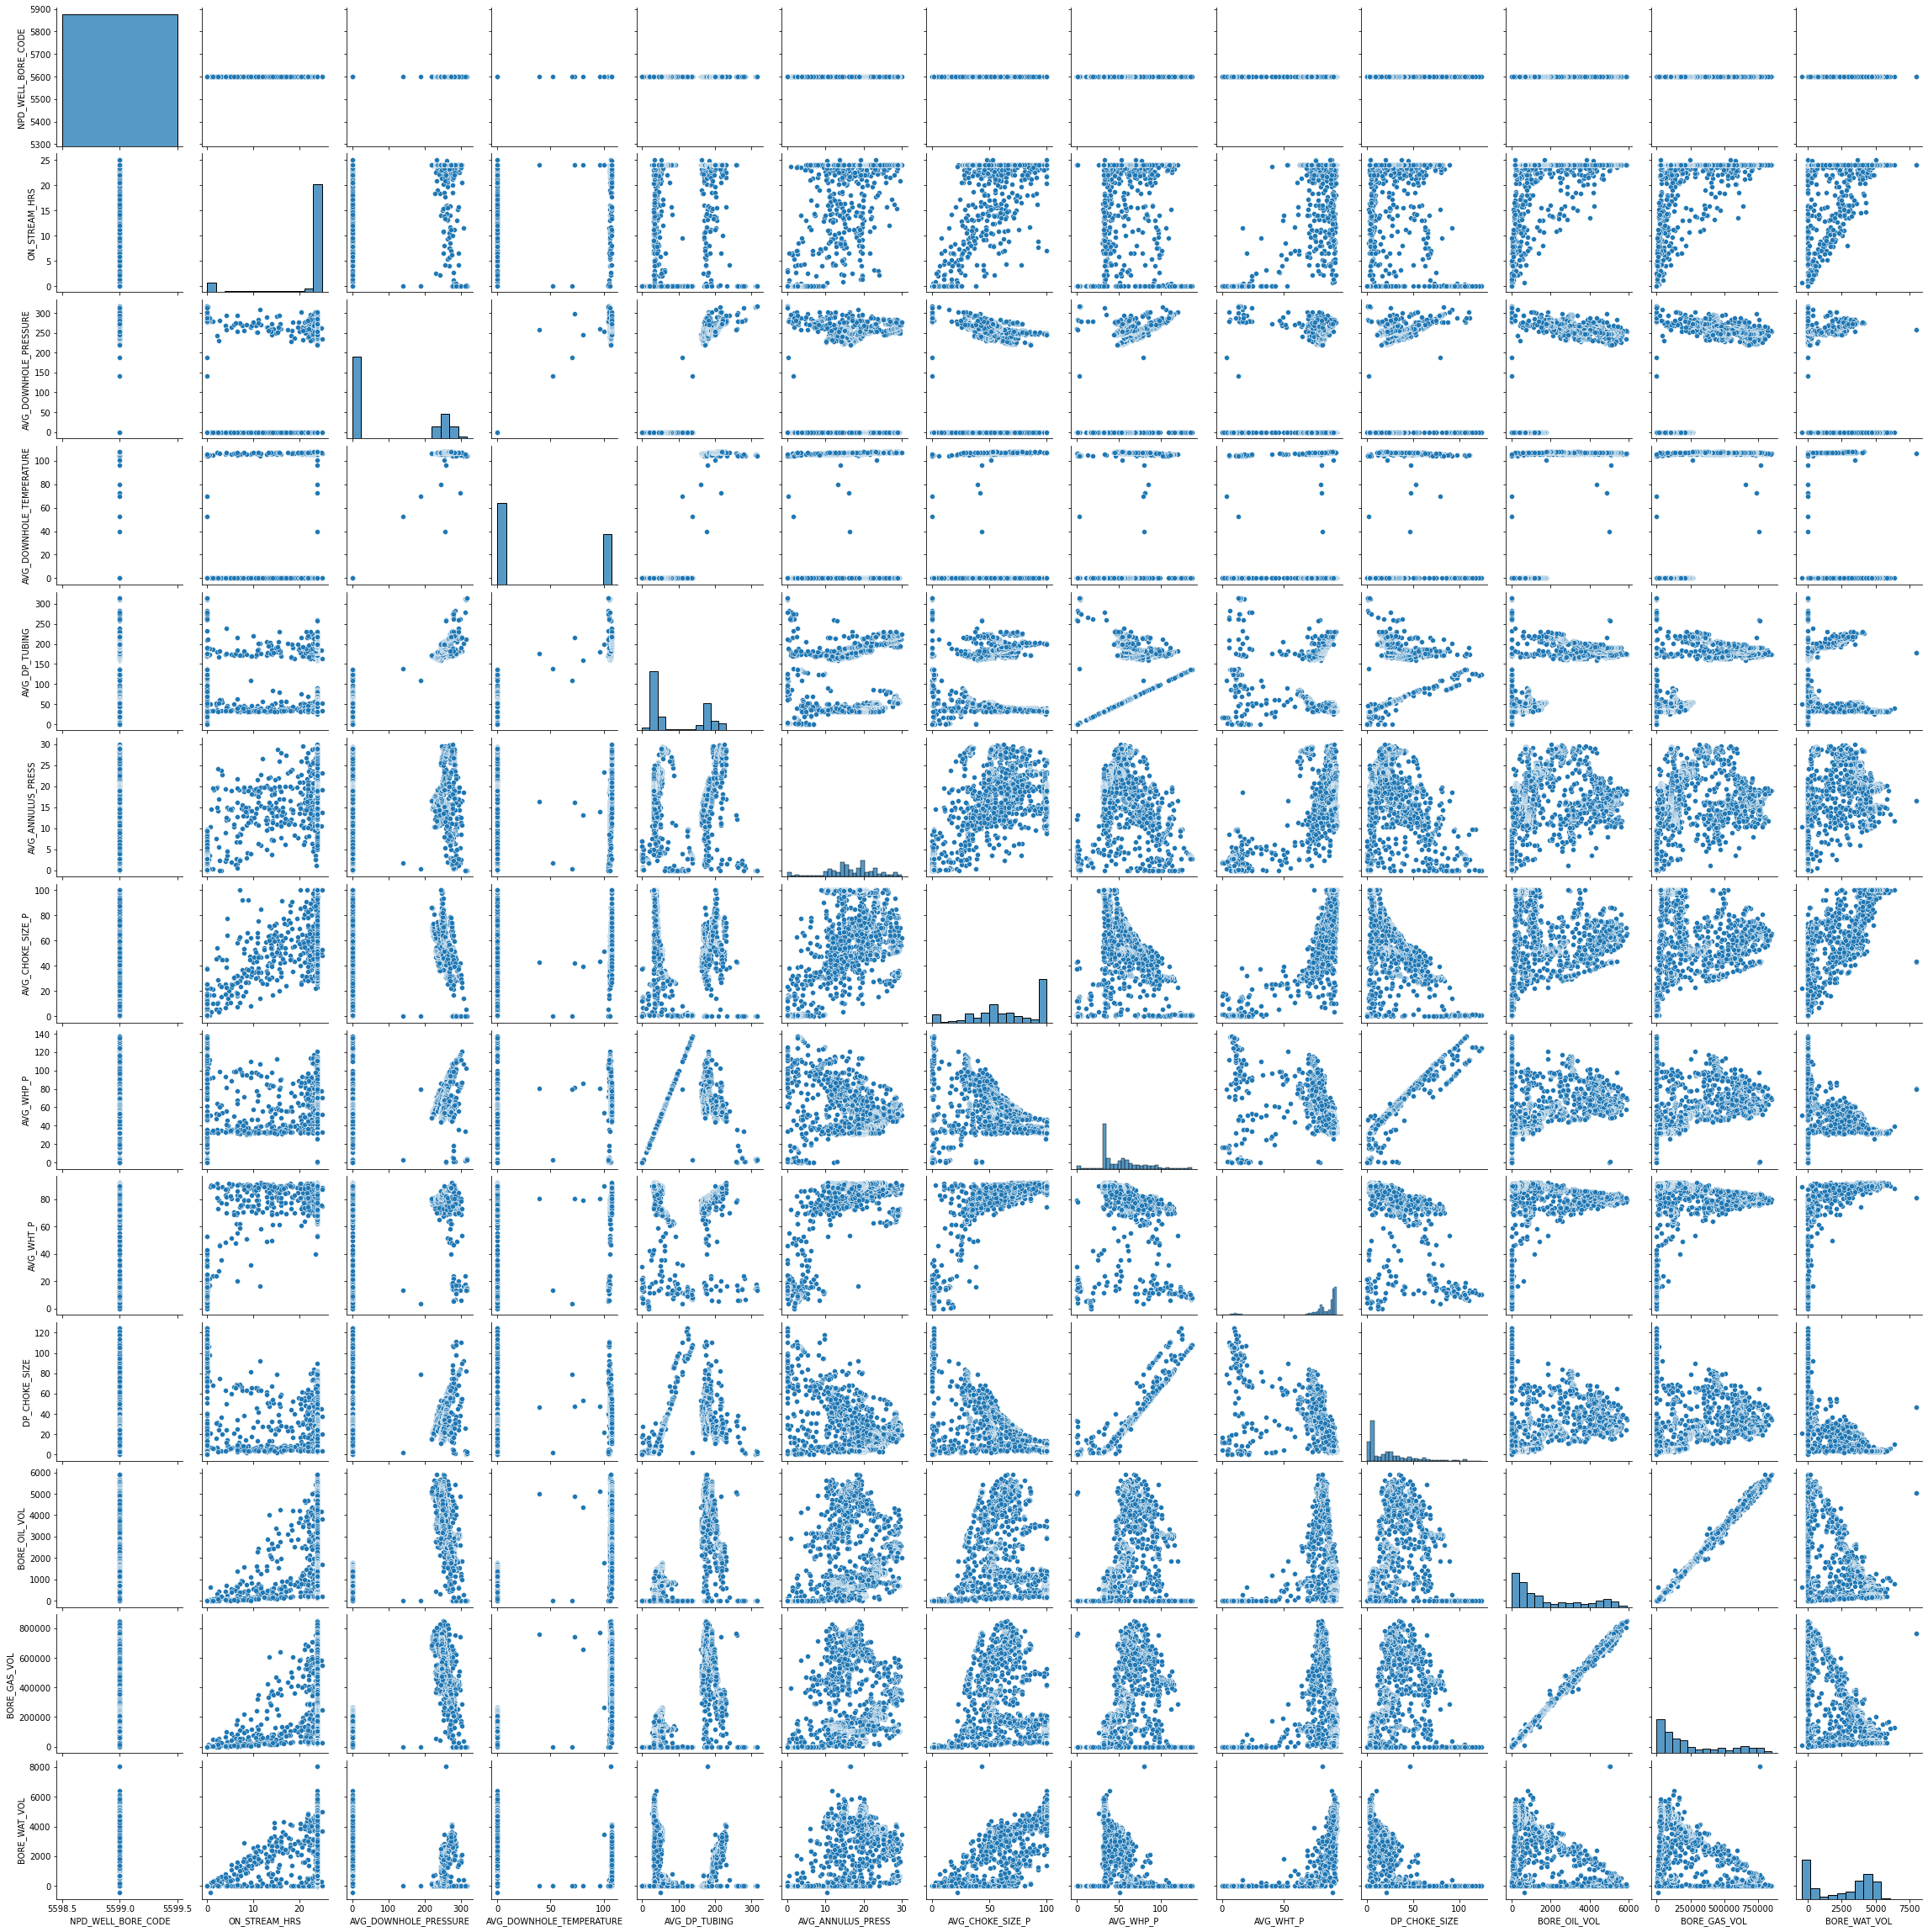

In [8]:
# Pairplot
sns.pairplot(data)

Text(0.5, 1.0, 'Pearson Correlation Heat Map')

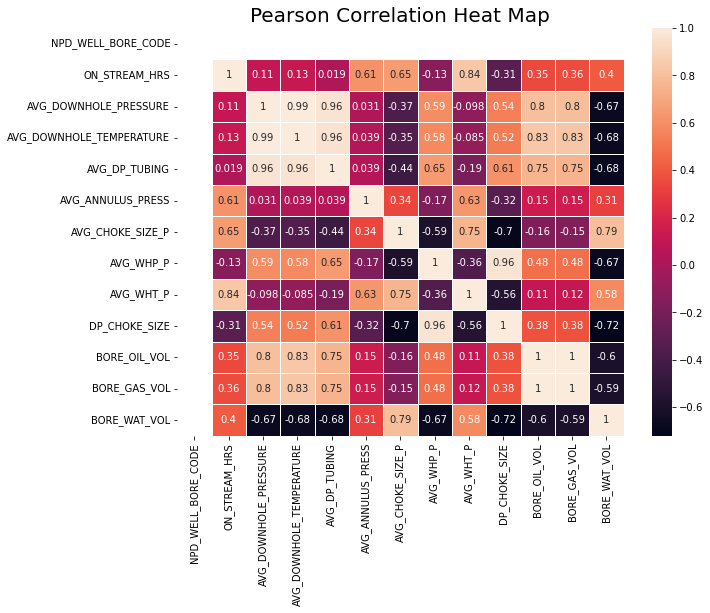

In [9]:
# Heatmap
plt.figure(figsize = (10,7.5))
plt.grid(axis = 'y', alpha = 0.5)
ax = sns.heatmap(data.corr(method = 'pearson'), annot = True, linewidth = 0.5)
ax.set_title('Pearson Correlation Heat Map', fontsize = 20)

<AxesSubplot:xlabel='NPD_WELL_BORE_CODE', ylabel='BORE_WAT_VOL'>

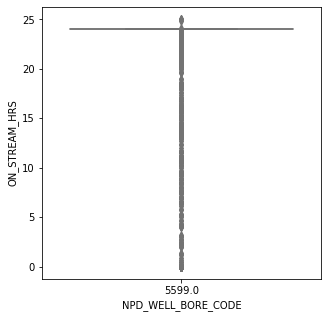

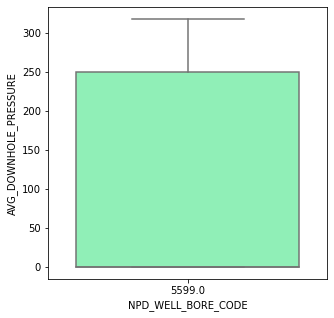

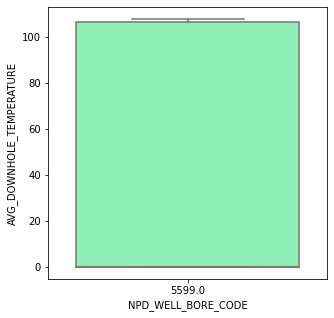

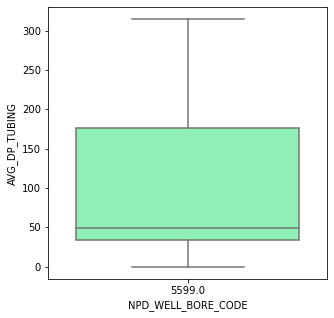

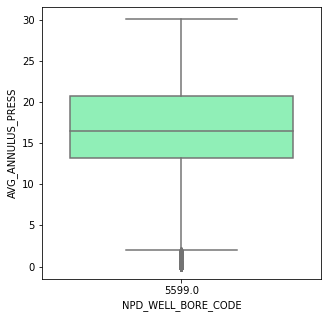

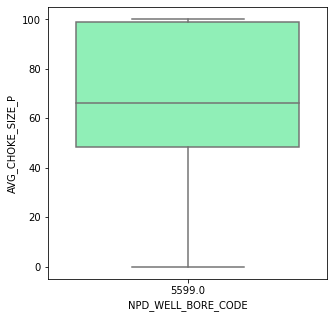

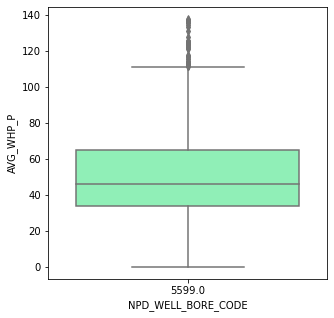

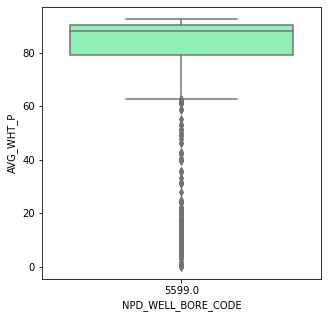

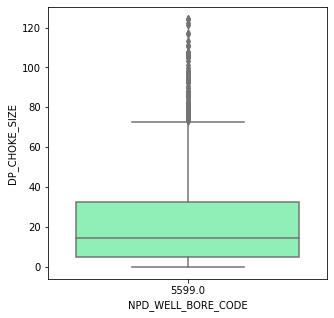

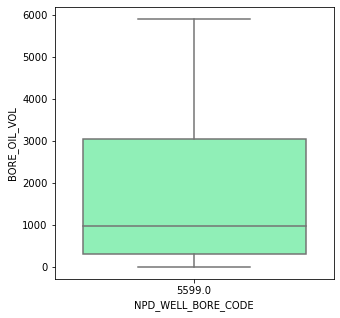

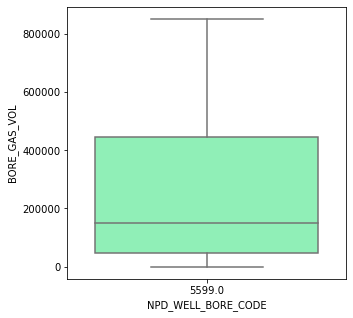

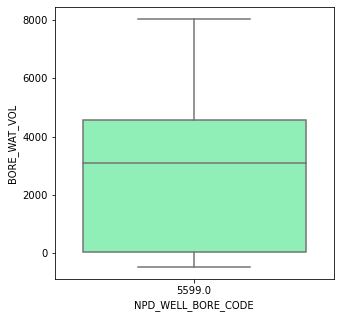

In [13]:
#Plotting boxplots for all the main features to visualize the distribution of data

figuresizes = (5,5)
plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'ON_STREAM_HRS', data=data, palette = 'rainbow')

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'AVG_DOWNHOLE_PRESSURE', data=data, palette = 'rainbow')

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'AVG_DOWNHOLE_TEMPERATURE', data=data, palette = 'rainbow')

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'AVG_DP_TUBING', data=data, palette = 'rainbow')

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'AVG_ANNULUS_PRESS', data=data, palette = 'rainbow')

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'AVG_CHOKE_SIZE_P', data=data, palette = 'rainbow')

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'AVG_WHP_P', data=data, palette = 'rainbow')

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'AVG_WHT_P', data=data, palette = 'rainbow')

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'DP_CHOKE_SIZE', data=data, palette = 'rainbow')

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'BORE_OIL_VOL', data=data, palette = 'rainbow')

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'BORE_GAS_VOL', data=data, palette = 'rainbow')

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'BORE_WAT_VOL', data=data, palette = 'rainbow')

### Filling Null Values
Data is highly skewed and depends on the well, hence padding is used to fill the missing values

In [14]:
data['ON_STREAM_HRS'] = data['ON_STREAM_HRS'].fillna(method='pad')
data['AVG_DOWNHOLE_PRESSURE'] = data['AVG_DOWNHOLE_PRESSURE'].fillna(method='pad')
data['AVG_DOWNHOLE_TEMPERATURE'] = data['AVG_DOWNHOLE_TEMPERATURE'].fillna(method='pad')
data['AVG_DP_TUBING'] = data['AVG_DP_TUBING'].fillna(method='pad')
data['AVG_ANNULUS_PRESS'] = data['AVG_ANNULUS_PRESS'].fillna(method='pad')
data['AVG_CHOKE_SIZE_P'] = data['AVG_CHOKE_SIZE_P'].fillna(method='pad')
data['AVG_WHP_P'] = data['AVG_WHP_P'].fillna(method='pad')
data['AVG_WHT_P'] = data['AVG_WHT_P'].fillna(method='pad')
data['DP_CHOKE_SIZE'] = data['DP_CHOKE_SIZE'].fillna(method='pad')
data['BORE_OIL_VOL'] = data['BORE_OIL_VOL'].fillna(method='pad')
data['BORE_GAS_VOL'] = data['BORE_GAS_VOL'].fillna(method='pad')
data['BORE_WAT_VOL'] = data['BORE_WAT_VOL'].fillna(method='pad')

In [15]:
test['AVG_DP_TUBING'] = test['AVG_DP_TUBING'].fillna(method='pad')
test['AVG_ANNULUS_PRESS'] = test['AVG_ANNULUS_PRESS'].fillna(method='pad')
test['AVG_CHOKE_SIZE_P'] = test['AVG_CHOKE_SIZE_P'].fillna(method='pad')
test['AVG_WHP_P'] = test['AVG_WHP_P'].fillna(method='pad')
test['AVG_WHT_P'] = test['AVG_WHT_P'].fillna(method='pad')
test['DP_CHOKE_SIZE'] = test['DP_CHOKE_SIZE'].fillna(method='pad')
test['BORE_GAS_VOL'] = test['BORE_GAS_VOL'].fillna(method='pad')
test['BORE_WAT_VOL'] = test['BORE_WAT_VOL'].fillna(method='pad')

In [16]:
to_drop = ["NPD_WELL_BORE_CODE", "NPD_WELL_BORE_NAME"]
data = data.drop(to_drop, axis=1)
test = test.drop(to_drop, axis=1)

### Data Preparation
The next step is to drop outliers based on ZScore and then divide the data into "features" (inputs) and "labels" (outputs) and removing the unwanted data. After which we finally shuffle and scale the data.

In [17]:
#Data with Z score less than 3
(np.abs(zscore(data)) < 2.5).all(axis=1).sum()

2290

In [18]:
#Removing outliers
data=data[(np.abs(zscore(data)) < 2.5).all(axis=1)]

In [19]:
X = data.drop(['BORE_OIL_VOL'],axis=1)
Y = data['BORE_OIL_VOL']

In [20]:
X, Y = shuffle(X, Y, random_state=42)

In [21]:
minmax = MinMaxScaler()
X = minmax.fit_transform(X)
test = minmax.transform(test)

### Model Training

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

In [23]:
RF_model = RandomForestRegressor(n_estimators=150, random_state=0)
RF_model.fit(X_train,Y_train)
Y_pred_RF = RF_model.predict(X_test)
mae = mean_absolute_error(Y_test,Y_pred_RF)
err_RF = 'MAE: ' + str(round(mae,8))
print('Random Forest Tree Regression Model Performance:-- ',err_RF)

Random Forest Tree Regression Model Performance:--  MAE: 25.92941776


In [24]:
r2_score(Y_test, Y_pred_RF)

0.9990692009061798

Text(50.0, 10.0, 'MAE: 25.92941776')

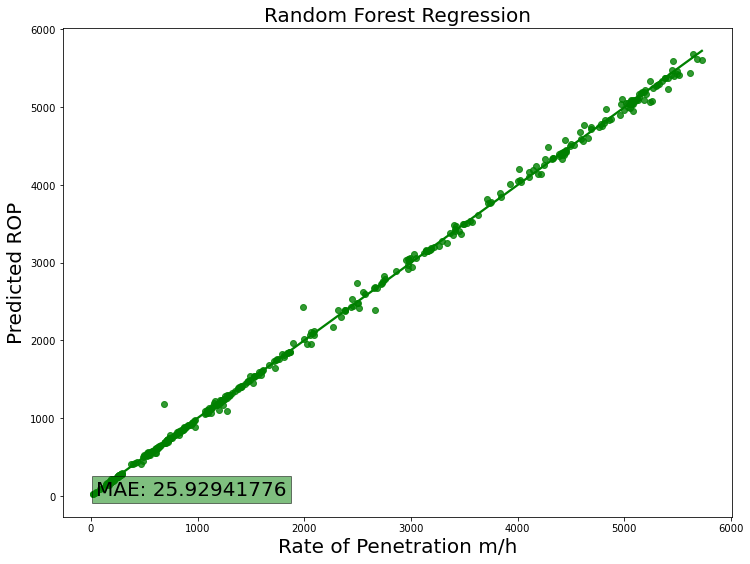

In [25]:
plt.figure(figsize = (12,9))
ax = sns.regplot(Y_test, Y_pred_RF, marker = 'o', color = 'green')
ax.set_title('Random Forest Regression', fontsize = 20)
ax.set_xlabel('Rate of Penetration m/h', fontsize = 20)
ax.set_ylabel('Predicted ROP', fontsize = 20)
plt.text(50.0, 10.0, err_RF, fontsize=20, bbox=dict(facecolor='green', alpha=0.5))

### Model Evaluation

In [26]:
cv_results = (cross_val_score(RF_model, X, Y, cv = KFold(10)))
print("Random Forest Regression, Mean_Accuracy: ", round(cv_results.mean(), 8))

Random Forest Regression, Mean_Accuracy:  0.99881307
